<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [72]:
#Importation de la librairie Pandas
import pandas as pd
import openpyxl
import numpy as np

In [73]:
#Importation de la librairie plotly express
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [74]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
path="drive/MyDrive/Projet6/"

In [77]:
#Importation des fichiers
df_erp= pd.read_excel(path+'erp.xlsx')
df_web=pd.read_excel(path+'web.xlsx')
df_liaison=pd.read_excel(path+'liaison.xlsx')


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [78]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [79]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


In [80]:
#Afficher les 5 premières lignes de la table
df_erp.head()


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [81]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
nombre_doublons_product_id = df_erp['product_id'].duplicated().sum()
print(f"Le nombre de doublon pour la colonne 'product_id' est de : {nombre_doublons_product_id}")

Le nombre de doublon pour la colonne 'product_id' est de : 0


In [82]:
#Afficher les valeurs distinctes de la colonne stock_status
valeurs_stock_status = df_erp['stock_status'].unique()  # Par exemple
print(f"La colonne stock_status peut prendre comme valeur: {', '.join(str(i) for i in valeurs_stock_status)}")

#À quelle(s) autre(s) colonne(s) sont-elles liées ?
print("La colonne 'stock_status' est relié à la colonne 'stock_quantity'.\nLorsque 'stock_quantity' est supérieur à 0, le produit est instock sinon il est outofstock.")

La colonne stock_status peut prendre comme valeur: instock, outofstock
La colonne 'stock_status' est relié à la colonne 'stock_quantity'.
Lorsque 'stock_quantity' est supérieur à 0, le produit est instock sinon il est outofstock.


In [83]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp["stock_status_2"] = df_erp["stock_quantity"].apply(lambda x: "outofstock" if x <= 0 else "instock")

In [84]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

,0
0,True
1,True
2,True
3,True
4,False
...,...
820,True
821,True
822,True
823,True


In [85]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
# Comparer les valeurs et calculer le nombre de différences
nombre_valeurs_differentes = (df_erp["stock_status"] == df_erp["stock_status_2"]).sum()

# Afficher le résultat
print(f"Nous trouvons {nombre_valeurs_differentes} valeurs identiques entre les 2 colonnes stock_status et stock_status_2.\nPar conséquent {df_erp['stock_status'].shape[0]-nombre_valeurs_differentes} lignes sont différentes.")

Nous trouvons 823 valeurs identiques entre les 2 colonnes stock_status et stock_status_2.
Par conséquent 2 lignes sont différentes.


In [86]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
lignes_differentes_corrigees = df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]
print("Valeur stock_status & stock_status_2 différentes :")
print(lignes_differentes_corrigees)



Valeur stock_status & stock_status_2 différentes :
     product_id  onsale_web  price  stock_quantity stock_status  purchase_price stock_status_2
4          4039           1   46.0               3   outofstock           23.77        instock
398        4885           1   18.7               0      instock            9.66     outofstock


In [87]:
df_erp.loc[df_erp["stock_quantity"] <= 0, "stock_status"] = "outofstock"

# Si stock_quantity > 0, mettre "instock" dans stock_status
df_erp.loc[df_erp["stock_quantity"] > 0, "stock_status"] = "instock"

# Vérifier si des incohérences persistent après correction
lignes_differentes_corrigees = df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]
print("Lignes avec des incohérences après correction :")
print(lignes_differentes_corrigees)

Lignes avec des incohérences après correction :
Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, stock_status_2]
Index: []


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [88]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
prix_non_renseigne = df_erp["price"].isna().sum()
print("Nombre d'articles avec un prix non renseigné: {}".format(prix_non_renseigne))#Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
prix_min=df_erp["price"].min()
print(f"prix maximum article: {prix_min}")
#Afficher le prix maximum de la colonne "price"
prix_max=df_erp['price'].max()
print(f"prix maximum article: {prix_max}")
#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
prix_inferieur_zero = df_erp[df_erp["price"] < 0]
print("Articles avec des prix inférieurs à 0 :")
print(prix_inferieur_zero)

# Suppression des lignes où price<0

df_erp=df_erp[df_erp["price"]>0]
# je vérifie les résultats
prix_inferieur_zero_corrige = df_erp[df_erp["price"] < 0]
print("Articles avec des prix inférieurs à 0 après correction :")
print(prix_inferieur_zero_corrige)



Nombre d'articles avec un prix non renseigné: 0
prix maximum article: -20.0
prix maximum article: 225.0
Articles avec des prix inférieurs à 0 :
     product_id  onsale_web  price  stock_quantity stock_status  purchase_price stock_status_2
151        4233           0  -20.0               0   outofstock           10.33     outofstock
469        5017           0   -8.0               0   outofstock            4.34     outofstock
739        6594           0   -9.1              19      instock            4.61        instock
Articles avec des prix inférieurs à 0 après correction :
Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, stock_status_2]
Index: []


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [89]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity

# Afficher la quantité minimum de la colonne "stock_quantity"
print(f"Quantité minimum de la colonne 'stock_quantity' : {df_erp['stock_quantity'].min()}")

# Afficher la quantité maximum de la colonne "stock_quantity"
print(f"Quantité maximum de la colonne 'stock_quantity' : {df_erp['stock_quantity'].max()}")

#Afficher les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
stock_inferieur_a_zero=df_erp[df_erp["stock_quantity"]<0]
print("Stock inférieur à zéro :")
stock_inferieur_a_zero

Quantité minimum de la colonne 'stock_quantity' : -10
Quantité maximum de la colonne 'stock_quantity' : 145
Stock inférieur à zéro :


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
449,4973,0,10.0,-10,outofstock,4.96,outofstock
573,5700,1,44.5,-1,outofstock,22.30,outofstock


In [90]:
# Mettre à zéro les stocks qui sont négatifs
df_erp.loc[df_erp['stock_quantity'] < 0, 'stock_quantity'] = 0

stock_inferieur_a_zero=df_erp[df_erp["stock_quantity"]<0]
print("Stock inférieur à zéro :")
stock_inferieur_a_zero

Stock inférieur à zéro :


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [91]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
valeurs_onsale_web = df_erp['onsale_web'].unique()
print("Valeurs distinctes dans la colonne 'onsale_web' :", valeurs_onsale_web)

print(" La valeur '1' signifie que le produit n'est pas en vente sur le web et '0' qu'il l'est")


Valeurs distinctes dans la colonne 'onsale_web' : [1 0]
 La valeur '1' signifie que le produit n'est pas en vente sur le web et '0' qu'il l'est


In [92]:
#Quelles sont les colonnes à conserver selon vous?
print("Les colonnes à conserver sont : \n-product_id,\n-onsale_web,\n-price,\n-stock_quantity\n-purchase_price")


Les colonnes à conserver sont : 
-product_id,
-onsale_web,
-price,
-stock_quantity
-purchase_price


In [93]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante
#avec la colonne "stock_status".
df_erp.drop(columns=['stock_status_2'], inplace=True)
df_erp.head()



<ipython-input-93-07d9d11eedd1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,instock,23.77


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [94]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price :
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
nb_purchase_price_non_renseignes = df_erp['purchase_price'].isna().sum()
print(f"Nombre d'articles avec un prix non renseigné : {nb_purchase_price_non_renseignes}")

#Afficher le prix minimum de la colonne "purchase_price"
purchase_price_min = df_erp['purchase_price'].min(skipna=True)
print(f"Prix minimal de la colonne 'purchase_price' : {purchase_price_min}")
#Afficher le prix maximum de la colonne "purchase_price"
purchase_price_max = df_erp['purchase_price'].max(skipna=True)
print(f"Prix maximal de la colonne 'purchase_price' : {purchase_price_max}")

Nombre d'articles avec un prix non renseigné : 0
Prix minimal de la colonne 'purchase_price' : 2.74
Prix maximal de la colonne 'purchase_price' : 137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>


In [95]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
#Nombre de caractéristiques
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)


In [96]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.info()
df_web.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,11862,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-12 13:46:23,2018-02-12 12:46:23,NaN,Vin,Gilles Robin Hermitage Rouge 2012,NaN,publish,closed,closed,NaN,gilles-robin-hermitage-2012,2019-01-31 12:12:56,2019-01-31 11:12:56,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,16057,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-04-17 15:29:17,2018-04-17 13:29:17,NaN,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,NaN,publish,closed,closed,NaN,pelle-sancerre-rouge-la-croix-au-garde-2017,2020-07-07 10:05:02,2020-07-07 08:05:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,14692,0,0,0,0.0,5.0,taxable,NaN,2.0,2019-03-19 10:06:47,2019-03-19 09:06:47,NaN,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,<div>Grâce à la complémentarité des 3 cépages ...,publish,closed,closed,NaN,fonreaud-bordeaux-blanc-le-cygne-2016,2020-04-25 21:40:31,2020-04-25 19:40:31,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16295,0,0,0,0.0,14.0,NaN,NaN,2.0,2018-02-15 14:05:06,2018-02-15 13:05:06,NaN,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,NaN,publish,closed,closed,NaN,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,15328,0,0,0,0.0,2.0,taxable,NaN,2.0,2019-03-27 18:05:09,2019-03-27 17:05:09,NaN,Vin,Agnès Levet Côte Rôtie Maestria 2017,"<span style=""float: none; background-color: tr...",publish,closed,closed,NaN,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [97]:
#Selon vous, quelles sont les colonnes à conserver ?
colonnes_a_conserver = ["sku", "total_sales", "post_title", "product_type",
                         "post_date", "post_modified","guid","post_type"]
colonnes_a_supprimer = ["virtual","downloadable","tax_status","rating_count","tax_class","average_rating","tax_class","post_author","post_date","post_date_gmt","post_content","post_exerpt","post_status","comment_status","ping_status","post_password","post_name","post_modified","post_modified_gmt","post_content_filtered","post_parent","menu_order","post_mime_type","comment_count"]
print("Avec les objectifs de l'analyse que je dois construire, je dois conserver les colonnes suivantes :")
for c in colonnes_a_conserver:print(f"-{c}")
print()
print("Les colonnes qu'il convient de supprimer car inutile pour l'analyse sont :")
for c in colonnes_a_supprimer:print(f"-{c}")

Avec les objectifs de l'analyse que je dois construire, je dois conserver les colonnes suivantes :
-sku
-total_sales
-post_title
-product_type
-post_date
-post_modified
-guid
-post_type

Les colonnes qu'il convient de supprimer car inutile pour l'analyse sont :
-virtual
-downloadable
-tax_status
-rating_count
-tax_class
-average_rating
-tax_class
-post_author
-post_date
-post_date_gmt
-post_content
-post_exerpt
-post_status
-comment_status
-ping_status
-post_password
-post_name
-post_modified
-post_modified_gmt
-post_content_filtered
-post_parent
-menu_order
-post_mime_type
-comment_count


In [98]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération

df_web=df_web[colonnes_a_conserver]
df_web.head()

,sku,total_sales,post_title,product_type,post_date,post_modified,guid,post_type
0,11862,3.0,Gilles Robin Hermitage Rouge 2012,Vin,2018-02-12 13:46:23,2019-01-31 12:12:56,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1,16057,5.0,Domaine Pellé Sancerre Rouge La Croix Au Garde...,Vin,2018-04-17 15:29:17,2020-07-07 10:05:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
2,14692,5.0,Château Fonréaud Bordeaux Blanc Le Cygne 2016,Vin,2019-03-19 10:06:47,2020-04-25 21:40:31,https://www.bottle-neck.fr/?post_type=product&...,product
3,16295,14.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,Vin,2018-02-15 14:05:06,2020-08-27 18:55:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
4,15328,2.0,Agnès Levet Côte Rôtie Maestria 2017,Vin,2019-03-27 18:05:09,2020-07-25 15:45:02,https://www.bottle-neck.fr/?post_type=product&...,product


In [99]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
df_anomalies_non_decimal = df_web[~df_web["sku"].astype(str).str.match(r"^\d+$")]
df_anomalies_non_decimal


,sku,total_sales,post_title,product_type,post_date,post_modified,guid,post_type
8,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
20,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
30,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
37,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
41,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...
1387,bon-cadeau-25-euros,7.0,Bon cadeau de 25€,NaN,2018-06-01 13:53:46,2018-06-01 14:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
1429,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
1445,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN


In [100]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
valeurs_anormales = df_anomalies_non_decimal["sku"].unique()
print("Liste des erreurs de la colonne sku :")
for e in valeurs_anormales:print(f"-{e}")

Liste des erreurs de la colonne sku :
-nan
-13127-1
-bon-cadeau-25-euros


Les erreurs de codifications je les laisse tel quel car peut être qu'il y a une correspondance dans le fichier erp

In [101]:
#Identifier les lignes sans code articles
nombre_nan_sku = df_web["sku"].isna().sum()

# Afficher le nombre de NaN
print(f"Nombre de lignes avec un SKU manquant : {nombre_nan_sku}")


Nombre de lignes avec un SKU manquant : 85


In [102]:

# Effacer les lignes contenant des Nan
df_web = df_web[~df_web["sku"].isin(valeurs_anormales[0:1])]
df_web = df_web.reset_index(drop=True)
# Vérification
nombre_nan_sku = df_web["sku"].isna().sum()
print(f"Nombre de lignes avec un SKU manquant : {nombre_nan_sku}")
df_web.head(10)


Nombre de lignes avec un SKU manquant : 0


,sku,total_sales,post_title,product_type,post_date,post_modified,guid,post_type
0,11862,3.0,Gilles Robin Hermitage Rouge 2012,Vin,2018-02-12 13:46:23,2019-01-31 12:12:56,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1,16057,5.0,Domaine Pellé Sancerre Rouge La Croix Au Garde...,Vin,2018-04-17 15:29:17,2020-07-07 10:05:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
2,14692,5.0,Château Fonréaud Bordeaux Blanc Le Cygne 2016,Vin,2019-03-19 10:06:47,2020-04-25 21:40:31,https://www.bottle-neck.fr/?post_type=product&...,product
3,16295,14.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,Vin,2018-02-15 14:05:06,2020-08-27 18:55:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
4,15328,2.0,Agnès Levet Côte Rôtie Maestria 2017,Vin,2019-03-27 18:05:09,2020-07-25 15:45:02,https://www.bottle-neck.fr/?post_type=product&...,product
5,15471,4.0,Château d'Arcole Saint-Emilion Grand Cru 2016,Vin,2019-03-19 15:58:25,2020-06-18 10:45:05,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
6,16515,10.0,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,Vin,2018-06-02 09:31:31,2020-08-27 10:11:12,https://www.bottle-neck.fr/?post_type=product&...,product
7,16246,10.0,Domaine de La Tour Du Bon Bandol Blanc 2019,Vin,2018-02-28 14:46:15,2020-08-26 15:55:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
8,13572,17.0,Château Tour Haut-Caussan Médoc 2015,Vin,2019-03-19 11:33:39,2020-08-26 16:55:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
9,16513,13.0,Domaine Schoenheitz Riesling Herrenreben 2018,Vin,2018-04-17 22:20:31,2020-08-26 15:55:04,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


In [103]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
# Compter les occurrences de chaque SKU
sku_counts = df_web["sku"].value_counts()

# Afficher uniquement les SKU dupliqués (ceux qui apparaissent plus d'une fois)

print(f"Nombre de SKU modifié :{sku_counts[sku_counts > 1].sum()}")


Nombre de SKU modifié :1428


In [104]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:

#1 - Créer un dataframe avec uniquement les lignes sans code article
df_sans_code_article = df_web[df_web["sku"].isna() | (df_web["sku"] == "")]
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_sans_code_article.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sku            0 non-null      object        
 1   total_sales    0 non-null      float64       
 2   post_title     0 non-null      object        
 3   product_type   0 non-null      object        
 4   post_date      0 non-null      datetime64[ns]
 5   post_modified  0 non-null      datetime64[ns]
 6   guid           0 non-null      object        
 7   post_type      0 non-null      object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 0.0+ bytes


In [105]:
# Suppression des doublons de SKU.
print("Il convient de supprimer les lignes où la colonne 'post_type'=='attachement' et garder celle où elles sont égales à 'product'.")

df_web=df_web[df_web["post_type"]=='product']
df_web=df_web.reset_index(drop=True)
sku_counts = df_web["sku"].value_counts()

print(f"Nombre de doublons sku : {sku_counts[sku_counts > 1].sum()}")

df_web.head(10)


Il convient de supprimer les lignes où la colonne 'post_type'=='attachement' et garder celle où elles sont égales à 'product'.
Nombre de doublons sku : 0


,sku,total_sales,post_title,product_type,post_date,post_modified,guid,post_type
0,14692,5.0,Château Fonréaud Bordeaux Blanc Le Cygne 2016,Vin,2019-03-19 10:06:47,2020-04-25 21:40:31,https://www.bottle-neck.fr/?post_type=product&...,product
1,15328,2.0,Agnès Levet Côte Rôtie Maestria 2017,Vin,2019-03-27 18:05:09,2020-07-25 15:45:02,https://www.bottle-neck.fr/?post_type=product&...,product
2,16515,10.0,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,Vin,2018-06-02 09:31:31,2020-08-27 10:11:12,https://www.bottle-neck.fr/?post_type=product&...,product
3,16585,15.0,Xavier Frissant Touraine Sauvignon 2019,Vin,2018-02-16 14:03:16,2020-08-27 09:30:36,https://www.bottle-neck.fr/?post_type=product&...,product
4,12869,7.0,Stéphane Tissot Arbois D.D. 2016,Vin,2019-03-28 14:29:35,2019-12-13 15:40:01,https://www.bottle-neck.fr/?post_type=product&...,product
5,15575,11.0,Château Plaisance Fronton Rouge 2017,Vin,2018-04-17 16:29:35,2020-07-31 10:25:02,https://www.bottle-neck.fr/?post_type=product&...,product
6,14338,16.0,Maurel Pays d'Oc Cabernet-Sauvignon 2017,Vin,2019-03-15 10:13:30,2020-03-11 09:30:06,https://www.bottle-neck.fr/?post_type=product&...,product
7,16560,13.0,Borie La Vitarèle Saint-Chinian Les Terres Bla...,Vin,2018-02-15 09:12:13,2020-08-25 10:25:02,https://www.bottle-neck.fr/?post_type=product&...,product
8,15361,13.0,Domaine Schoenheitz Muscat 2017,Vin,2018-04-17 22:01:10,2020-07-27 14:25:03,https://www.bottle-neck.fr/?post_type=product&...,product
9,15022,0.0,Oratoire Saint Martin Cairanne Rouge Les Douye...,Vin,2018-02-12 13:14:22,2020-08-27 18:45:02,https://www.bottle-neck.fr/?post_type=product&...,product


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [106]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))
#Nombre de caractéristiques
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))


Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [107]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [108]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
nb_total_lignes = df_liaison.shape[0]
nb_uniques_product_id = df_liaison["product_id"].nunique()

if nb_total_lignes == nb_uniques_product_id:
    print("Toutes les valeurs de la colonne 'product_id' sont uniques.")
else:
    print(f"Il y a des doublons. {nb_total_lignes - nb_uniques_product_id} valeurs sont dupliquées.")

Toutes les valeurs de la colonne 'product_id' sont uniques.


In [109]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
nb_uniques_id_web=df_liaison["id_web"].nunique()

if nb_total_lignes == nb_uniques_id_web :
   print("Toutes les valeurs de la colonne 'id_web' sont uniques.")
else:
    print(f"Il y a des doublons. {nb_total_lignes - nb_uniques_id_web} valeurs sont dupliquées.")


Il y a des doublons. 91 valeurs sont dupliquées.


In [110]:
#Avons-nous des articles sans correspondances?
articles_sans_correspondance=df_liaison["id_web"].isna().sum()
if articles_sans_correspondance==0:
  print("Tout les articles ont une correspondance")
else:
  print(f"Il manque des correspondances pour des articles : {articles_sans_correspondance}.\nPar conséquent les doublons sont seulement des articles sans correspondance et non des valeurs duppliqués.")


Il manque des correspondances pour des articles : 91.
Par conséquent les doublons sont seulement des articles sans correspondance et non des valeurs duppliqués.


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [111]:
#Fusion des fichiers df_erp et df_liaison
df_erp_liaison=df_erp.merge(df_liaison,left_on="product_id",right_on="product_id",how="outer")
df_erp_liaison.head()


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web
0,3847,1.0,24.2,16.0,instock,12.88,15298
1,3849,1.0,34.3,10.0,instock,17.54,15296
2,3850,1.0,20.8,0.0,outofstock,10.64,15300
3,4032,1.0,14.1,26.0,instock,6.92,19814
4,4039,1.0,46.0,3.0,instock,23.77,19815


In [112]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
non_match_erp = df_erp[~df_erp["product_id"].isin(df_liaison["product_id"])]

if non_match_erp.empty:
  print("Toutes les données ont une correspondance entre elles.")
else:
  print("Certains product_id ne correspondent pas.")


Toutes les données ont une correspondance entre elles.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [113]:
#Fusionnez les datasets df_merge et df_web, left??? fait des troues, inner=aucun trou
df_merge = df_erp_liaison.merge(df_web, how='outer', left_on="id_web", right_on="sku",indicator=True)
df_merge[df_merge["_merge"] != "both"]
#df_merge.head()


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,post_title,product_type,post_date,post_modified,guid,post_type,_merge
81,4741,0.0,12.4,0.0,outofstock,6.66,12601,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,left_only
127,5957,0.0,39.0,0.0,outofstock,20.75,13577,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,left_only
139,4289,0.0,22.8,0.0,outofstock,11.90,13771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,left_only
180,4869,0.0,17.2,0.0,outofstock,9.33,14360,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,left_only
185,5955,0.0,27.3,0.0,outofstock,13.68,14377,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7196,0.0,31.0,55.0,instock,31.20,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,left_only
821,7200,0.0,31.0,6.0,instock,15.54,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,left_only
822,7201,0.0,31.0,18.0,instock,16.02,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,left_only
823,7203,0.0,45.0,30.0,instock,23.48,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,left_only


In [114]:
#Avons-nous des lignes sans correspondances?
lignes_sans_correspondance = df_merge[df_merge["id_web"].isna() | df_merge["sku"].isna()]
nb_lignes_sans_correspondance=len(lignes_sans_correspondance)
total_lignes=len(df_merge)

print(f"Nombre de lignes sans correspondance : {nb_lignes_sans_correspondance}")
print(f"Pourcentage du nombre de  lignes sans correpondance : {100*(nb_lignes_sans_correspondance/total_lignes):.2f}%")

lignes_sans_correspondance_erp = df_merge[df_merge["id_web"].isna()]
lignes_sans_correspondance_web=df_merge[df_merge["sku"].isna()]
print(f"{len(lignes_sans_correspondance_web)} lignes sans correspondance proviennent du df_web. Cela représente {100*(len(lignes_sans_correspondance_web)/nb_lignes_sans_correspondance):.2f}% du total des lignes sans correspondance.")
print(f"{len(lignes_sans_correspondance_erp)} lignes sans correspondance proviennent du df_erp. Cela représente {100*(len(lignes_sans_correspondance_erp)/nb_lignes_sans_correspondance):.2f}% du total des lignes sans correspondance.")

Nombre de lignes sans correspondance : 111
Pourcentage du nombre de  lignes sans correpondance : 13.45%
111 lignes sans correspondance proviennent du df_web. Cela représente 100.00% du total des lignes sans correspondance.
91 lignes sans correspondance proviennent du df_erp. Cela représente 81.98% du total des lignes sans correspondance.


In [115]:
# Supprimons ces lignes sans correpondances
df_merge=df_merge.dropna(subset=["id_web", "sku"])

print("Lignes sans correspondances supprimées.")
print(f"il reste :{len(df_merge)} lignes.")

Lignes sans correspondances supprimées.
il reste :714 lignes.


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

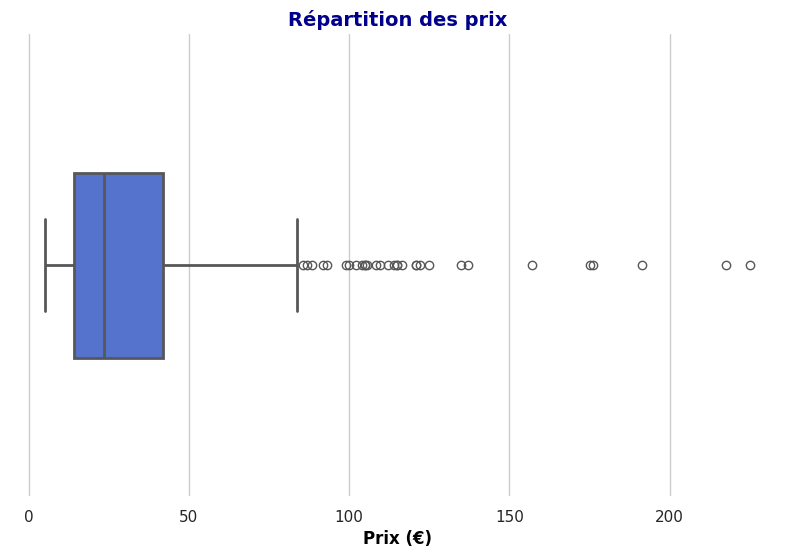

In [116]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.boxplot(
    x=df_merge["price"],
    color="royalblue",
    width=0.4,
    flierprops={"marker": "o", "color": "red", "markersize": 6},
    linewidth=2
)

plt.title("Répartition des prix", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Prix (€)", fontsize=12, fontweight="bold", color="black")
sns.despine(left=True, bottom=True)
plt.show()

In [117]:
#Autre méthode avec plotly express
fig = px.box(
    df_merge,
    x="price",
    points="all",
    title="Répartition des prix",
    color_discrete_sequence=["royalblue"]
)

fig.update_layout(
    title_font_size=16,
    title_x=0.5,
    xaxis_title="Prix (€)",
    font=dict(family="Arial", size=12),
    plot_bgcolor="white",
    showlegend=False
)


fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [118]:
# Calcul de la moyenne du prix
moyenne_prix = df_merge["price"].mean()
print(f"Moyenne du prix : {moyenne_prix:.2f} €")

# Calcul de l'écart-type du prix
ecart_type_prix = df_merge["price"].std()
print(f"Écart-type du prix : {ecart_type_prix:.2f}")

#Calculer le Z-score
df_merge["z_score_price"] = (df_merge["price"] - moyenne_prix) / ecart_type_prix
print(df_merge[["price", "z_score_price"]])

Moyenne du prix : 32.33 €
Écart-type du prix : 27.60
     price  z_score_price
0      8.6      -0.860030
1     41.0       0.314039
2     39.0       0.241565
3     59.9       0.998912
4     22.5      -0.356340
..     ...            ...
728   58.0       0.930063
729   58.0       0.930063
730   92.0       2.162110
731   54.8       0.814105
733   25.0      -0.265748

[714 rows x 2 columns]


In [119]:
#Quel est le seuil prix dont z-score est supérieur à 3?
seuil_prix_zscore_3 = df_merge[df_merge["z_score_price"] > 3]["price"]
print(f"Nombre de prix où zscore > 3 : {len(seuil_prix_zscore_3)} ")
print("Prix dont le Z-score est supérieur à 3 :")
print(seuil_prix_zscore_3)


fig = px.box(df_merge, x="price", title="Répartition des prix avec seuil Z-score > 3", points="all")
fig.add_vline(
    x=df_merge[df_merge["z_score_price"] > 3]["price"].min(),
    line=dict(color="red", dash="dash"),
    annotation_text="Seuil Z-score = 3",
    annotation_position="top right"
)

fig.update_layout(
    title_font_size=16,
    title_x=0.5,
    xaxis_title="Prix (€)",
    font=dict(family="Arial", size=12),
    plot_bgcolor="white",
)

fig.show()

Nombre de prix où zscore > 3 : 13 
Prix dont le Z-score est supérieur à 3 :
24     176.0
33     157.0
171    137.0
204    217.5
235    122.0
256    124.8
257    135.0
269    191.3
281    121.0
282    121.0
291    116.4
313    175.0
567    225.0
Name: price, dtype: float64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [120]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
statistiques=df_erp["price"].describe()
print(statistiques)
Q1 = statistiques["25%"]
Q3 = statistiques["75%"]
IQR = Q3 - Q1

count    822.000000
mean      32.350304
std       26.622453
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64


In [121]:
#Définissez un seuil pour les articles "outliers" en prix
borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR
print(f"Borne inférieure : {borne_inferieure:.2f}")
print(f"Borne supérieure (seuil des outliers): {borne_superieure:.2f}")


Borne inférieure : -26.50
Borne supérieure (seuil des outliers): 83.10


In [122]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
# Identifier les outliers
outliers = df_erp[(df_erp["price"] < borne_inferieure) | (df_erp["price"] > borne_superieure)]

# Calcul du nombre d'outliers
nombre_outliers = len(outliers)

# Calcul du nombre total d'articles
nombre_total = len(df_erp)

# Calcul de la proportion d'outliers
proportion_outliers = (nombre_outliers / nombre_total) * 100

# Afficher les résultats
print(f"Nombre d'articles considérés comme outliers : {nombre_outliers}")
print(f"Proportion d'outliers dans l'ensemble du catalogue : {proportion_outliers:.2f}%")



Nombre d'articles considérés comme outliers : 36
Proportion d'outliers dans l'ensemble du catalogue : 4.38%


In [123]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
outliers = df_merge[df_merge["z_score_price"] > 3]
outliers

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,post_title,product_type,post_date,post_modified,guid,post_type,_merge,z_score_price
24,4402,1.0,176.0,11.0,instock,78.25,3510,3510,3.0,Cognac Frapin VIP XO,Cognac,2018-03-22 11:21:05,2020-08-22 11:35:03,https://www.bottle-neck.fr/?post_type=product&...,product,both,5.205993
33,4406,1.0,157.0,12.0,instock,69.08,7819,7819,4.0,Cognac Frapin Château de Fontpinot 1989 20 Ans...,Cognac,2018-03-22 11:42:48,2020-03-14 16:05:04,https://www.bottle-neck.fr/?post_type=product&...,product,both,4.517496
171,4904,1.0,137.0,9.0,instock,67.95,14220,14220,3.0,Domaine Des Croix Corton Charlemagne Grand Cru...,Vin,2018-05-15 10:23:41,2020-05-19 17:15:02,https://www.bottle-neck.fr/?post_type=product&...,product,both,3.792762
204,5001,1.0,217.5,18.0,instock,116.87,14581,14581,2.0,David Duband Charmes-Chambertin Grand Cru 2014,Vin,2018-07-17 09:45:39,2020-05-16 09:00:05,https://www.bottle-neck.fr/?post_type=product&...,product,both,6.709816
235,5917,1.0,122.0,12.0,instock,54.24,14775,14775,3.0,Wemyss Malts Single Cask Scotch Whisky Choc 'n...,Whisky,2019-04-04 16:49:37,2020-03-11 09:30:09,https://www.bottle-neck.fr/?post_type=product&...,product,both,3.249211
256,5612,1.0,124.8,19.0,instock,66.41,14915,14915,1.0,Domaine Weinbach Gewurztraminer Grand Cru Furs...,Vin,2019-01-15 15:30:49,2019-01-23 09:33:57,https://www.bottle-neck.fr/?post_type=product&...,product,both,3.350674
257,6126,1.0,135.0,138.0,instock,80.33,14923,14923,5.0,Champagne Gosset Célébris Vintage 2007,Champagne,2019-06-28 17:22:27,2020-08-27 11:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,both,3.720288
269,5892,1.0,191.3,98.0,instock,116.06,14983,14983,6.0,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,Champagne,2019-03-28 10:21:36,2020-04-01 09:30:09,https://www.bottle-neck.fr/?post_type=product&...,product,both,5.760415
281,6216,1.0,121.0,14.0,instock,60.02,15070,15070,2.0,Domaine des Comtes Lafon Volnay 1er Cru Champa...,Vin,2019-07-25 09:31:09,2020-07-30 09:30:08,https://www.bottle-neck.fr/?post_type=product&...,product,both,3.212975
282,6213,1.0,121.0,9.0,instock,63.14,15072,15072,3.0,Domaine des Comtes Lafon Volnay 1er Cru Santen...,Vin,2019-07-25 09:10:32,2020-06-25 09:30:06,https://www.bottle-neck.fr/?post_type=product&...,product,both,3.212975


In [124]:
print(f"Catégories des articles  Z-Score > 3 :{df_merge[df_merge['z_score_price'] > 3]['product_type'].unique().tolist()}.")
print(f"Prix d'achat moyen des articles Z-Score > 3 : {round(df_merge[df_merge['z_score_price']>3]['purchase_price'].mean(),2)} euros")
print("Etant donné la nature des produits vendus, certains peuvent être luxueux.Leur prix moyen d'achat relativement élevé, on peut en conclure que ce niveau de prix est justifié.\nPar conséquent, dans ce contexte, il convient de les conserver.")

Catégories des articles  Z-Score > 3 :['Cognac', 'Vin', 'Whisky', 'Champagne'].
Prix d'achat moyen des articles Z-Score > 3 : 81.83 euros
Etant donné la nature des produits vendus, certains peuvent être luxueux.Leur prix moyen d'achat relativement élevé, on peut en conclure que ce niveau de prix est justifié.
Par conséquent, dans ce contexte, il convient de les conserver.


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

In [125]:
# Afficher toutes les lignes dupliqués de df_merge
dupliques = df_merge[df_merge.duplicated(keep=False)]
print("Lignes dupliquées :")
dupliques



Lignes dupliquées :


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,post_title,product_type,post_date,post_modified,guid,post_type,_merge,z_score_price


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [126]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
# 1. Créer une colonne "ca_par_article"
df_merge["ca_par_article"] = df_merge["total_sales"] * df_merge["price"]
#Calculez la somme de la colonne "ca_par_article"
ca_total = df_merge["ca_par_article"].sum()
#Ce résultat correspond au chiffre d'affaire du site web
print(f"Le chiffre d'affaires total du site web est : {ca_total:.2f} $")



Le chiffre d'affaires total du site web est : 143680.10 $


In [127]:
# Sélectionner les 10 premiers articles par quantités vendues
df_groupe_produit = df_merge.groupby("product_id", as_index=False).agg({
    "post_title": "first",
    "total_sales": "sum"  })

df_top10_quantites = df_groupe_produit.sort_values(by="total_sales", ascending=False).head(10)

fig = px.bar(
    df_top10_quantites,
    x="post_title",
    y="total_sales",
    labels={"post_title": "Produit", "total_sales": "Quantités Vendues"},
    title="🔝 Top 10 des articles par Quantités Vendues",
    color="total_sales",
    color_continuous_scale="Viridis",
    template='plotly_dark'
)
fig.update_layout(
    width=1200,
    height=600,
    margin=dict(l=50, r=50, t=50, b=200),
)


fig.update_xaxes(tickangle=45, tickfont=dict(size=12))

fig.show()

Nombre d'articles représentant 80% du CA : 434
Proportion du catalogue concernée : 60.78%


<ipython-input-128-f1f22a39efcd>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




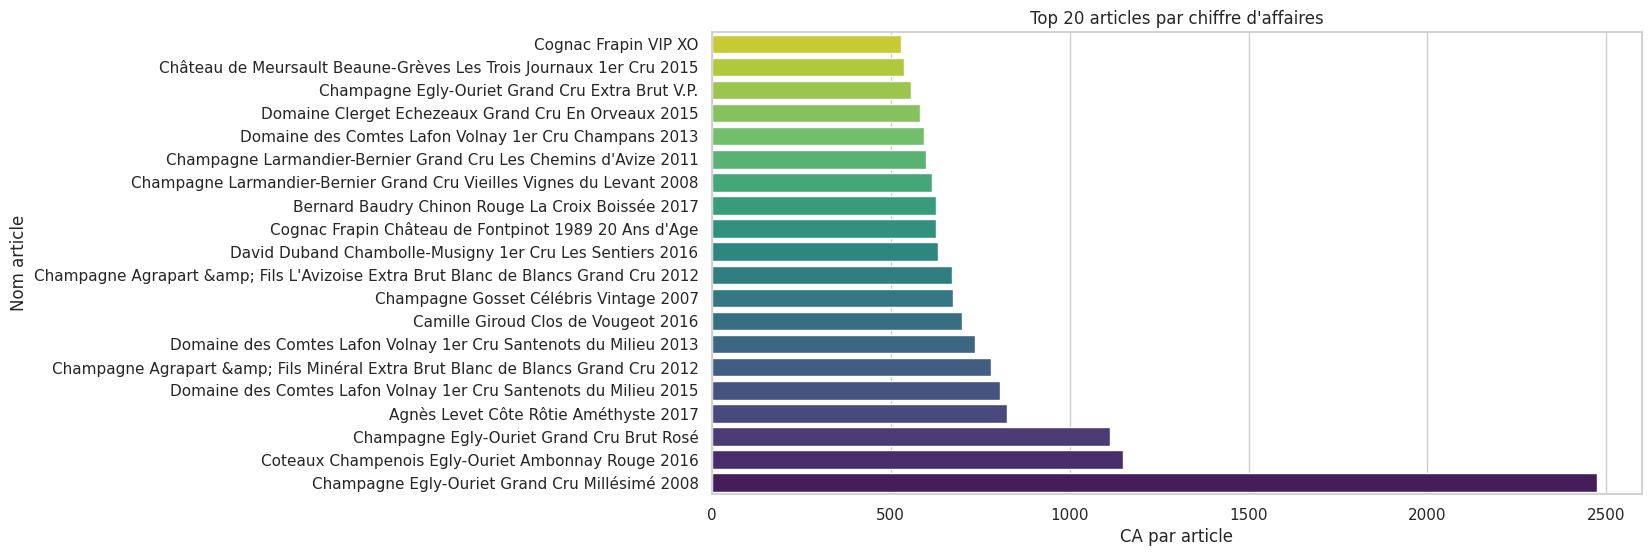

In [128]:
#############################
# Calculer le 20 / 80 en CA #
#############################

# 1. Calculer la part de CA par article
df_merge["part_CA"] = df_merge["ca_par_article"] / df_merge["ca_par_article"].sum()

# 2. Trier les articles par CA décroissant
df_merge_sorted = df_merge.sort_values(by="ca_par_article", ascending=False, ignore_index=True)

# 3. Calculer la somme cumulative du CA
df_merge_sorted["cumulative_CA"] = df_merge_sorted["part_CA"].cumsum()

# 4. Identifier le nombre d'articles représentant 80% du CA
nb_articles_80_CA = (df_merge_sorted["cumulative_CA"] <= 0.80).sum()

# 5. Calculer la proportion de ces articles dans le catalogue
proportion_catalogue = nb_articles_80_CA / len(df_merge)

# 6. Afficher les résultats
print(f"Nombre d'articles représentant 80% du CA : {nb_articles_80_CA}")
print(f"Proportion du catalogue concernée : {proportion_catalogue:.2%}")

# 7. Graphique des 20 premiers articles par CA
plt.figure(figsize=(12, 6))
sns.barplot(x=df_merge_sorted["ca_par_article"][:20], y=df_merge_sorted["post_title"][:20], palette="viridis")
plt.xlabel("CA par article")
plt.ylabel("Nom article")
plt.title("Top 20 articles par chiffre d'affaires")
plt.gca().invert_yaxis()
plt.show()


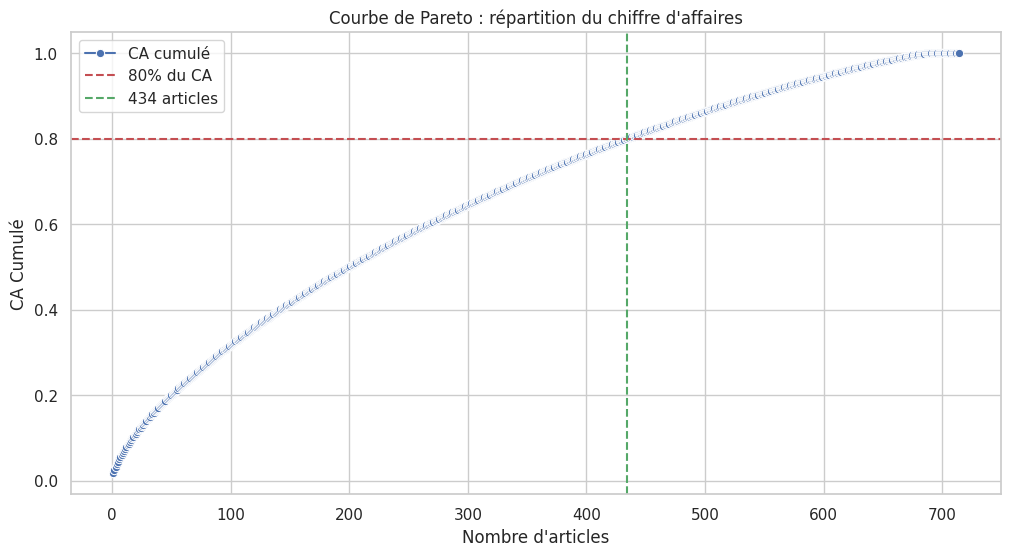

In [129]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, len(df_merge_sorted) + 1), y=df_merge_sorted["cumulative_CA"], marker="o", label="CA cumulé")
plt.axhline(y=0.80, color="r", linestyle="--", label="80% du CA")
plt.axvline(x=nb_articles_80_CA, color="g", linestyle="--", label=f"{nb_articles_80_CA} articles")
plt.xlabel("Nombre d'articles")
plt.ylabel("CA Cumulé")
plt.title("Courbe de Pareto : répartition du chiffre d'affaires")
plt.legend()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [130]:
#####################################
# Palmares des articles en quantité #
#####################################

df_merge_triees_par_quantites_vendues=df_merge.sort_values(by="total_sales",ascending=False)


df_merge_triees_par_quantites_vendues.reset_index()
top_20_articles_quantitees_vendues=df_merge_triees_par_quantites_vendues.head(20)

fig = px.bar(top_20_articles_quantitees_vendues,
             x='post_title',
             y='total_sales',
             title="Top 20 des articles en fonction des quantités vendues",
             labels={'post_title': 'Nom de l\'article', 'total_sales': 'Quantités vendues'},
             color='total_sales',
             color_continuous_scale='Viridis',
             template='plotly_dark')


fig.show()


In [131]:
#############################
# Calculer le 20 / 80 du total des ventes #
#############################

df_merge_sorted_vente = df_merge.sort_values(by='total_sales', ascending=False, ignore_index=True)

# 2. Créer une colonne calculant la part en quantité de chaque ligne dans le dataset
df_merge_sorted_vente['part_quantite'] = df_merge_sorted_vente['total_sales'] / df_merge_sorted_vente['total_sales'].sum()

# 3. Créer une colonne réalisant la somme cumulative de la colonne 'part_quantite'
df_merge_sorted_vente['somme_cumulative'] = df_merge_sorted_vente['part_quantite'].cumsum()

# 4. Filtrer les articles qui représentent jusqu'à 80% des ventes en quantité
df_80 = df_merge_sorted_vente[df_merge_sorted_vente['somme_cumulative'] <= 0.80]

# 5. Calculer le nombre d'articles représentant 80% des ventes en quantité
nb_articles_80 = df_80.shape[0]

# 6. Calculer la proportion de ces articles par rapport au total du catalogue
nb_articles_total = df_merge_sorted_vente.shape[0]
proportion_articles_80 = nb_articles_80 / nb_articles_total

# 7. Afficher la proportion d'articles représentant 80% des ventes
print(f"La proportion d'articles représentant 80% des ventes est de {(proportion_articles_80 * 100):.2f}%")

# Vérification : La somme cumulative des ventes pour les articles sélectionnés doit être proche de 0.80
print(f"Somme cumulative des ventes pour les {nb_articles_80} articles : {df_80['somme_cumulative'].iloc[-1]:.4f}")

La proportion d'articles représentant 80% des ventes est de 60.64%
Somme cumulative des ventes pour les 433 articles : 0.7999


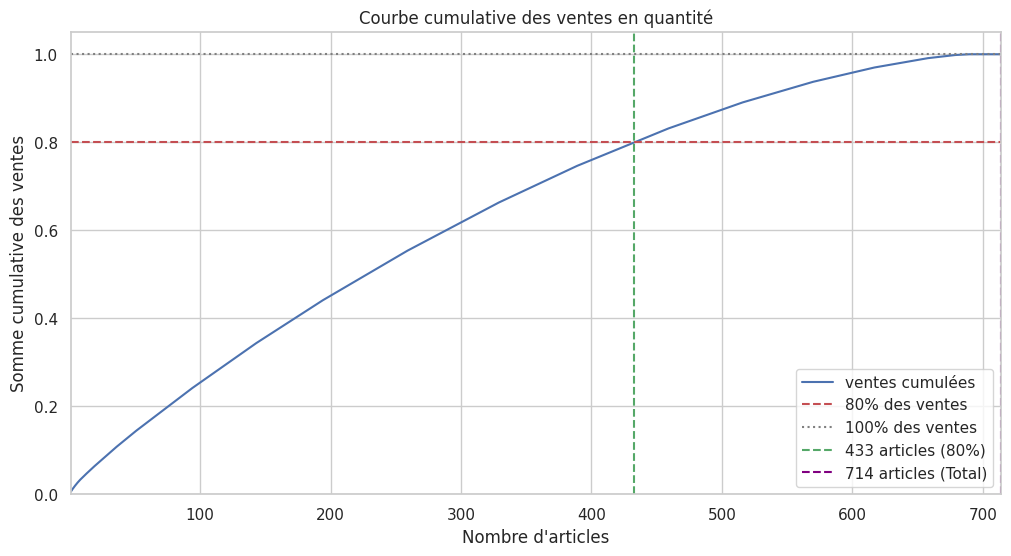

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, len(df_merge_sorted_vente) + 1), y=df_merge_sorted_vente['somme_cumulative'], label="ventes cumulées", color="b")
plt.axhline(y=0.80, color="r", linestyle="--", label="80% des ventes")
plt.axhline(y=1.00, color="gray", linestyle=":", label="100% des ventes")
plt.axvline(x=nb_articles_80, color="g", linestyle="--", label=f"{nb_articles_80} articles (80%)")
plt.axvline(x=len(df_merge_sorted_vente), color="purple", linestyle="--", label=f"{len(df_merge_sorted_vente)} articles (Total)")
plt.ylim(0, 1.05)
plt.xlim(1, len(df_merge_sorted_vente))
plt.xlabel("Nombre d'articles")
plt.ylabel("Somme cumulative des ventes")
plt.title("Courbe cumulative des ventes en quantité")
plt.legend()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

<ipython-input-133-86a5aa533c07>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-133-86a5aa533c07>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




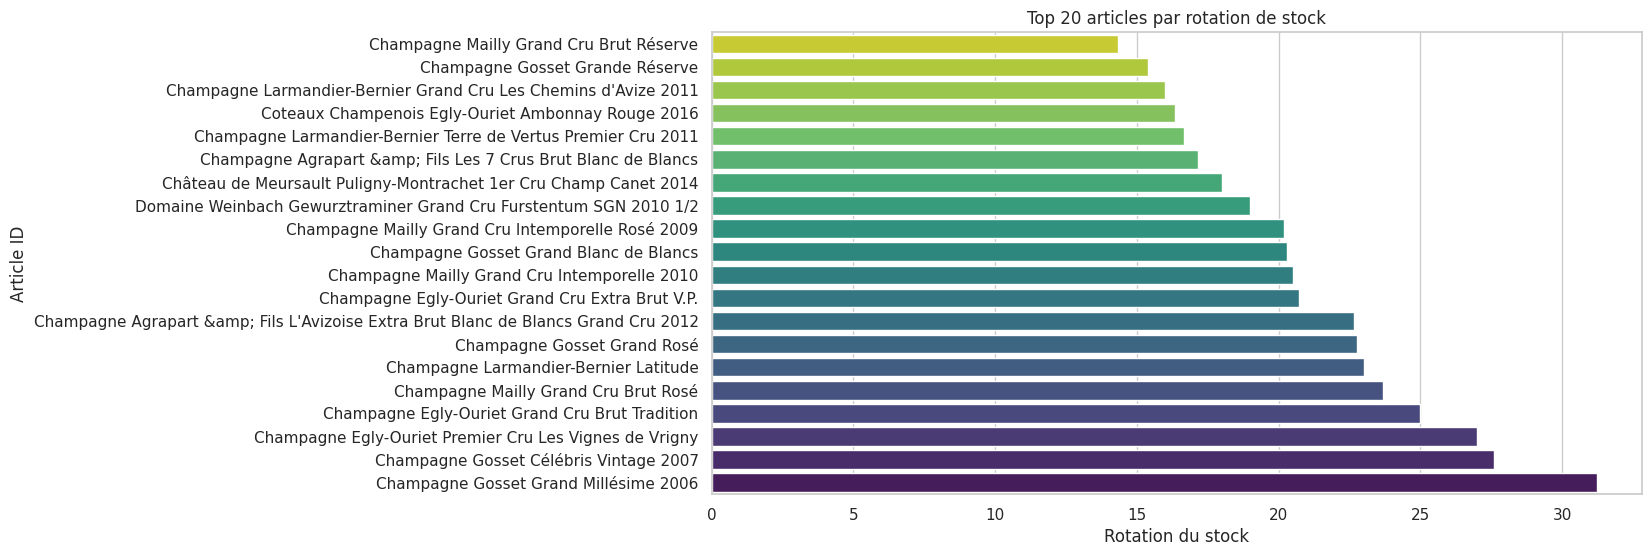

In [133]:

# créer colonne rotation_stock
df_merge["rotation_stock"]=df_merge["stock_quantity"]/df_merge["total_sales"]

# remplacer np.inf par 0
df_merge["rotation_stock"].replace(np.inf, 0, inplace=True)
# ordonnée le df par rotation de stock ascending=False
df_merge_sorted_stock = df_merge.sort_values(by="rotation_stock", ascending=False)
# réaliser uin barch des 20 premiers articles par rotation de stock
plt.figure(figsize=(12, 6))
sns.barplot(x=df_merge_sorted_stock["rotation_stock"][:20], y=df_merge_sorted_stock["post_title"][:20], palette="viridis")
plt.xlabel("Rotation du stock")
plt.ylabel("Article ID")
plt.title("Top 20 articles par rotation de stock")
plt.gca().invert_yaxis()
plt.show()

In [134]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_merge["Valorisation_stocks_en_euros"]=df_merge["stock_quantity"]*df_merge["purchase_price"]
#Calculer la somme de la colonne "Valorisation_stock_euros"
print(f"Les stocks de marchandise ont une valeure totale de : {df_merge['Valorisation_stocks_en_euros'].sum():.2f} euros.")

Les stocks de marchandise ont une valeure totale de : 277328.07 euros.


In [135]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity

print(f"Le nombre total de produits en stock est de : {df_merge['stock_quantity'].sum()}.")

Le nombre total de produits en stock est de : 16740.0.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [136]:
############################
# Analyse du taux de marge #
############################
#Création de la colonne Taux de marge
df_merge["taux_marge"]=((df_merge["price"])-(df_merge['purchase_price']))/(df_merge['purchase_price'])*100
#Afficher le prix minimum de la colonne "taux_marge"
print(f"Le taux de marge minimale (HT) fait sur un produit vaut: {df_merge['taux_marge'].min():.2f}%")
#Afficher le prix maximum de la colonne "taux_marge"
print(f"Le taux de marge maximale(HT) effectué sur un produit est de : {df_merge['taux_marge'].max():.2f}%")

Le taux de marge minimale (HT) fait sur un produit vaut: -83.67%
Le taux de marge maximale(HT) effectué sur un produit est de : 129.69%


In [137]:
#affichage de la ligne avec un taux de marge inférieur à 0
df_merge[df_merge["taux_marge"]<0]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,post_title,product_type,post_date,post_modified,guid,post_type,_merge,z_score_price,ca_par_article,part_CA,rotation_stock,Valorisation_stocks_en_euros,taux_marge
79,4355,1.0,12.65,97.0,instock,77.48,12589,12589,0.0,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Champagne,2018-03-02 10:46:10,2020-08-13 10:15:02,https://www.bottle-neck.fr/?post_type=product&...,product,both,-0.713272,0.0,0.0,0.0,7515.56,-83.673206


In [138]:
#création d'un dataframe avec les taux positifs
df_taux_marge_positif=df_merge[df_merge['taux_marge']>0]

#Afficher le prix minimum de la colonne "taux_marge"
print(f"Le prix minimum des produits ayant un taux de marge positif est : {df_taux_marge_positif['price'].min():.2f} euros.")
#Afficher le prix maximum de la colonne "taux_marge"
print(f"Le prix maximum des produits ayant un taux de marge positif est : {df_taux_marge_positif['price'].max():.2f} euros.")


Le prix minimum des produits ayant un taux de marge positif est : 5.20 euros.
Le prix maximum des produits ayant un taux de marge positif est : 225.00 euros.


In [139]:
#création d'un dataframe avec le taux de marge moyen par type de produit

df_taux_marge_type_produit = df_taux_marge_positif.groupby("product_type")["taux_marge"].mean().reset_index()

fig = px.bar(df_taux_marge_type_produit,
             x="product_type",
             y="taux_marge",
             title="Taux de Marge Moyen par Type de Produit",
             labels={"product_type": "Type de Produit", "taux_marge": "Taux de Marge Moyen (%)"},
             color="taux_marge",
             color_continuous_scale="Viridis")
fig.update_layout(yaxis_range=[0, 120])
fig.show()



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

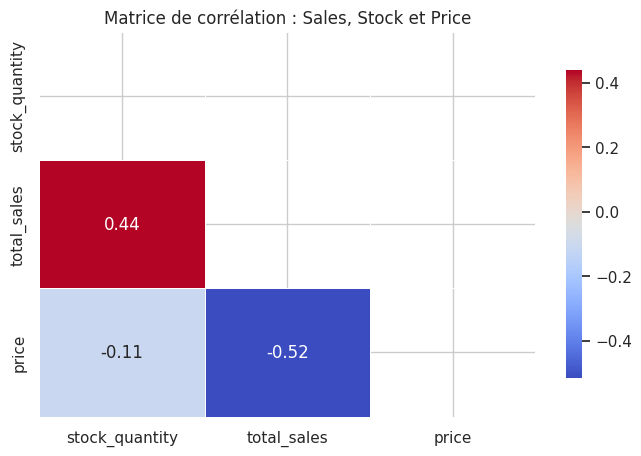

In [140]:
############################
# Analyse des correlations #
############################



df_corr = df_merge[["stock_quantity", "total_sales", "price"]]
matrice_correlation = df_corr.corr()
plt.figure(figsize=(8, 5))
mask = np.triu(np.ones_like(matrice_correlation, dtype=bool))
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask, cbar_kws={"shrink": 0.8})
plt.title("Matrice de corrélation : Sales, Stock et Price")
plt.show()

In [141]:
#Que peut-on conclure des correlations ?
print("Il n'y a pas de corrélation ou négligable (-0.11) entre le prix et la quantité en stock. \nCela suggère que le prix n'a pas d'impact significatif sur la quantité en stock.\n")
print("Il y a une corrélation négative  entre les ventes totales et la quantité en stock (-0.44).\nPar conséquent, si les ventes totales augmentent, la quantité en stock a tendance à diminuer, ce qui pourrait indiquer que les stocks sont réduits à mesure que les produits sont vendus.\n")
print("Il y a une corrélation négative entre le prix et les ventes totales (-0.52). \nPar conséquent, si le prix augmente, les ventes totales ont tendance à diminuer, ce qui pourrait refléter une sensibilité des consommateurs au prix.")

Il n'y a pas de corrélation ou négligable (-0.11) entre le prix et la quantité en stock. 
Cela suggère que le prix n'a pas d'impact significatif sur la quantité en stock.

Il y a une corrélation négative  entre les ventes totales et la quantité en stock (-0.44).
Par conséquent, si les ventes totales augmentent, la quantité en stock a tendance à diminuer, ce qui pourrait indiquer que les stocks sont réduits à mesure que les produits sont vendus.

Il y a une corrélation négative entre le prix et les ventes totales (-0.52). 
Par conséquent, si le prix augmente, les ventes totales ont tendance à diminuer, ce qui pourrait refléter une sensibilité des consommateurs au prix.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [142]:
#Mettre le dataset df_merge sur un fichier Excel
df_merge.to_excel("Projet6.xlsx", index=False)
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.
